# PUI 2017 HW 3-2
## Yuwen Chang (ywc249)

In [1]:
from __future__  import print_function, division
import pandas as pd
import numpy as np
import pylab as pl
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Idea
Weekend biking is more likely to be for leisure. Thus, weekend trips are likely to last longer in average than weekday trips, which commuting takes a greater proportion.

## Null Hypothesis
The avaerage trip duration on weekends is the same as or less than that of weekdays.

$H_0$ : $T_{weekend} <= T_{weekday}$

$H_1$ : $T_{weekend} > T_{weekday}$

or identically:

$H_0$ : $T_{weekend} - T_{weekday} <= 0$

$H_1$ : $T_{weekend} - T_{weekday} > 0$

## Significance level: $\alpha=0.05$

In [2]:
# Create a function that download specified data set and store it in PUIDATA
def getCitiBikeCSV(datestring):
    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
    os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
    os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
    os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

In [3]:
# Fetch first data set
datestring = '201501'
getCitiBikeCSV(datestring)

In [4]:
# Load data set to dataframe
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df['date'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
# List all columns
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
# Drop unwanted columns
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'], axis=1, inplace=True)
df.head()

,tripduration,date
0,1346,2015-01-01 00:01:00
1,363,2015-01-01 00:02:00
2,346,2015-01-01 00:04:00
3,182,2015-01-01 00:04:00
4,969,2015-01-01 00:05:00


In [7]:
# Generate a column for day of week
df['day'] = df['date'].dt.dayofweek + 1 # so that Monday starts with 1 instead of 0

# Generate a column for weekend indicator (dummy var)
df['weekend'] = 0
df.loc[df['day'] > 5, 'weekend'] = 1
df.head()

,tripduration,date,day,weekend
0,1346,2015-01-01 00:01:00,4,0
1,363,2015-01-01 00:02:00,4,0
2,346,2015-01-01 00:04:00,4,0
3,182,2015-01-01 00:04:00,4,0
4,969,2015-01-01 00:05:00,4,0


In [8]:
# Cross-tab to check the results
g1 = df['tripduration'].groupby([df['day'], df['weekend']])
g1.count().unstack()

weekend,0,1
day,,
1,38002.0,NaN
2,38879.0,NaN
3,43367.0,NaN
4,52905.0,NaN
5,57829.0,NaN
6,NaN,28080.0
7,NaN,26490.0


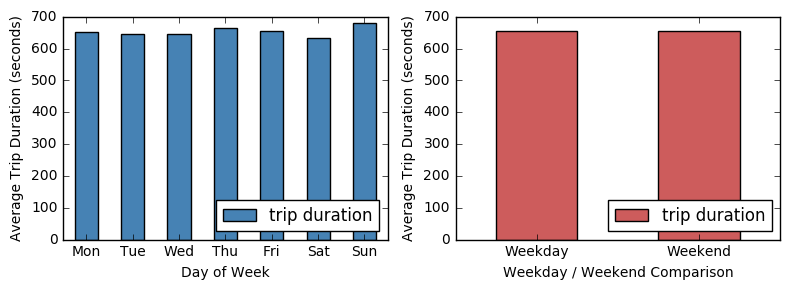

In [9]:
g2 = df['tripduration'].groupby([df['day']])
g3 = df['tripduration'].groupby([df['weekend']])

fig = pl.figure(figsize(8,3))

# Plot the histogram of average trip duration base on day of week
ax1 = fig.add_subplot(121)
(g2.mean()).plot(kind="bar", color='SteelBlue', label='trip duration')

ax1.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=10, rotation=0)
#ax1.set_ylim(bottom=620, top=700)
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Average Trip Duration (seconds)')
ax1.legend(loc='lower right')

# Plot the histogram of average trip duration base on weekdays/weekend
ax2 = fig.add_subplot(122)
(g3.mean()).plot(kind="bar", color='IndianRed', label='trip duration')

ax2.xaxis.set_ticklabels(['Weekday', 'Weekend'], fontsize=10, rotation=0)
#ax2.set_ylim(bottom=620, top=700)
ax2.set_xlabel('Weekday / Weekend Comparison')
ax2.set_ylabel('Average Trip Duration (seconds)')
ax2.legend(loc='lower right')

fig.tight_layout()

## Figure 1a: Histogram of average trip duration throughout the week
## Figure 1b: Comparison of average trip duration between weekday and weekend

## Is the mean trip duration on weekend shorter or equal to that of on weekdays?
### The t statistics of a two-sample t test:

$t = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_{1} - \mu_{2})}{SE}$

$SE = \sqrt{\frac{{S_1}^{2}}{n_1} + \frac{{S_2}^{2}}{n_2}}$

In [10]:
# Set variables
xbar1 = g3.mean()[1]
xbar2 = g3.mean()[0]
s1 = g3.std()[1]
s2 = g3.std()[0]
n1 = g3.count()[1]
n2 = g3.count()[0]

In [11]:
# Examine the existence of difference
diff = xbar1 - xbar2
print ("difference of mean duration time between weekdays and weekend: %.2f seconds"%diff)
if diff <= 0:
    # unable to reject null hypothesis
    print("In accordance with Null Hypothesis")
else:
    # check if the difference is significant
    print ("We must check the significance before we reject the Null Hypothesis")

difference of mean duration time between weekdays and weekend: 2.90 seconds
We must check the significance before we reject the Null Hypothesis


In [17]:
# Examine the significance level of the difference
se = np.sqrt((s1**2 / n1) + (s2**2 / n2))
t = (diff - 0) / se
print("t-value for alpha = 0.05 and n = %d is %.2f"%(n1, t))
if t >= 1.646:
    print("Reject Null Hypothesis")
else:
    print("Unable to reject Null Hypothesis")

t-value for alpha = 0.05 and n = 54570 is 0.65
Unable to reject Null Hypothesis


# Conclusion and Discussion
### Result of t-test:
- Unable to reject Null Hypothesis.
- The difference of trip duration between weekdays and weekend is not significant.
- There is no proof that people ride longer Citi Bike trips on weekends.

### Possible explanations
- People don't use citi bike for leisure
- The 30- & 45-minute constraints on each ride before charging extra money limit the duration of each trip; therefore, people could be riding longer trips by swithcing bikes.
- It's winter, people don't ride bikes for leisure in cold snowy days. (It turns out the Null Hypothesis is rejected in the data set '201507'.)

### More ways to exlpore
- See the distribution of longer trips (e.g., > 2 hours) throughout day of week
- See average counts of trips by day of week if weekends have significantly more trips

# Random notes

(array([ 28.,  28.,  14.,  21.,  19.,  11.,  14.,  18.,   9.,  21.]),
 array([ 14407. ,  17268.6,  20130.2,  22991.8,  25853.4,  28715. ,
         31576.6,  34438.2,  37299.8,  40161.4,  43023. ]),
 <a list of 10 Patch objects>)

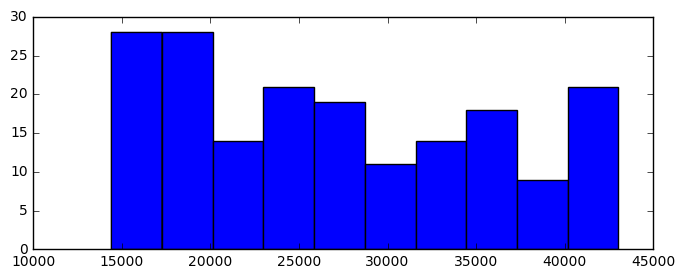

In [13]:
longtrips = list(df[df.tripduration > 14400]['tripduration'].values)
len(longtrips)/df.sum()
pl.hist(longtrips) #trips > 4 hours

In [14]:
len(longtrips)/df.tripduration.count()

0.00064086401075811065

In [15]:
#print(df.tripduration.count())
#df8 = df[df['tripduration'] <= 14400]
df2 = df[df['tripduration'] > 14400]
#print(df.tripduration.count())

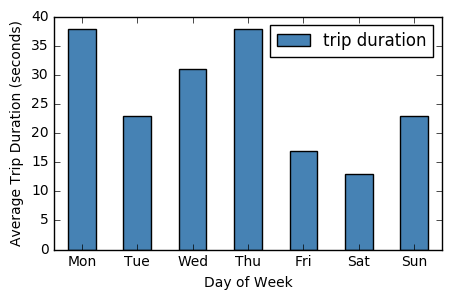

In [16]:
fig = pl.figure(figsize(5,3))
ax = (df2['tripduration'].groupby([df2['day']]).count()).plot(kind="bar", color='SteelBlue', label='trip duration')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=10, rotation=0)
#ax.set_ylim(bottom=600, top=700)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Trip Duration (seconds)')
ax.legend()